<a href="https://colab.research.google.com/github/SubhojeetBose/Spam_detection_with_boosting/blob/main/spam_detection_boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd  /content/drive/'MyDrive'/spambase

Mounted at /content/drive
/content/drive/MyDrive/spambase


In [ ]:
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier


iterations = 100

In [ ]:
# Loading the data and split into X and Y
data = pd.read_csv('spambase.data', sep=',', header= None)
data = data.sample(frac=1)
print(data.head(5))

X = data.iloc[:, :-1]
Y = data.iloc[:, -1:]

print(X.head(5))
print(Y.head(5))

        0     1     2    3     4     5     6     7     8     9   ...     48  \
1505  0.23  0.23  0.47  0.0  0.70  0.23  0.23  1.41  0.23  0.47  ...  0.000   
3924  0.12  0.00  0.12  0.0  0.12  0.00  0.00  0.00  1.11  0.00  ...  0.083   
4177  0.00  0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.000   
3111  0.00  1.85  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.000   
2395  0.00  0.00  0.85  0.0  1.36  0.00  0.00  0.00  0.00  0.17  ...  0.034   

         49     50     51     52   53     54   55   56  57  
1505  0.075  0.000  1.289  0.151  0.0  6.529  276  666   1  
3924  0.167  0.033  0.000  0.033  0.0  3.211   32  485   0  
4177  0.000  0.000  0.000  0.000  0.0  3.103   51   90   0  
3111  0.000  0.000  0.000  0.000  0.0  1.736    8   33   0  
2395  0.000  0.000  0.000  0.000  0.0  1.085    3   89   0  

[5 rows x 58 columns]
        0     1     2    3     4     5     6     7     8     9   ...   47  \
1505  0.23  0.23  0.47  0.0  0.70  0.23  0.23  1.41  0.23  

In [ ]:
# Split test and train
X_train = X[:3450]
X_test = X[3450:]

Y_train = Y[:3450]
Y_test = Y[3450:]

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
print(X_train.head(5))
print(Y_train.head(5))
print(X_test.head(5))
print(Y_test.head(5))

(3450, 57) (3450, 1) (1151, 57) (1151, 1)
        0     1     2    3     4     5     6     7     8     9   ...   47  \
1505  0.23  0.23  0.47  0.0  0.70  0.23  0.23  1.41  0.23  0.47  ...  0.0   
3924  0.12  0.00  0.12  0.0  0.12  0.00  0.00  0.00  1.11  0.00  ...  0.0   
4177  0.00  0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.0   
3111  0.00  1.85  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.0   
2395  0.00  0.00  0.85  0.0  1.36  0.00  0.00  0.00  0.00  0.17  ...  0.0   

         48     49     50     51     52   53     54   55   56  
1505  0.000  0.075  0.000  1.289  0.151  0.0  6.529  276  666  
3924  0.083  0.167  0.033  0.000  0.033  0.0  3.211   32  485  
4177  0.000  0.000  0.000  0.000  0.000  0.0  3.103   51   90  
3111  0.000  0.000  0.000  0.000  0.000  0.0  1.736    8   33  
2395  0.034  0.000  0.000  0.000  0.000  0.0  1.085    3   89  

[5 rows x 57 columns]
      57
1505   1
3924   0
4177   0
3111   0
2395   0
       0    1     2    3     4    

In [ ]:
# scaling the features of train and test
scale = StandardScaler().fit(X_train)

X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)

Y_train_scaled = np.where(np.squeeze(Y_train.to_numpy()) == np.zeros(len(Y_train)), -1, 1)
Y_test_scaled = np.where(np.squeeze(Y_test.to_numpy()) == np.zeros(len(Y_test)), -1, 1)

print(X_train_scaled[:10])
print(X_test_scaled[:10])
print(Y_train_scaled[:10])
print(Y_test_scaled[:10])

[[ 4.08521944e-01  5.41573802e-03  3.65900310e-01 -4.57405592e-02
   5.70930163e-01  4.96917510e-01  2.99156588e-01  3.48126601e+00
   4.81082291e-01  4.37405874e-01  8.19728976e-01 -7.57292408e-02
  -3.13348239e-01 -1.69042916e-01 -1.91336080e-01 -3.22368340e-01
   2.80727549e+00  5.26769314e-01 -3.95321867e-01  3.46667578e+00
   2.06351653e+00 -1.23340517e-01 -2.90611605e-01 -2.01959997e-01
  -3.23737155e-01 -3.07961065e-01 -2.32649627e-01 -2.36553458e-01
  -1.63436134e-01 -2.21246422e-01 -1.56699347e-01 -1.42593120e-01
  -1.67466556e-01 -1.45342949e-01 -1.89746989e-01 -2.49647529e-01
  -3.20826087e-01 -5.42998048e-02 -1.86865439e-01  1.14429867e+00
  -1.18419218e-01 -1.78168386e-01 -2.05593235e-01 -1.23136358e-01
  -7.81683976e-02 -1.92342760e-01 -6.83134899e-02 -1.08722159e-01
  -1.59093832e-01 -2.69447492e-01 -1.40427571e-01  1.19693417e+00
   3.48952499e-01 -1.22724357e-01  5.48268501e-02  1.78777274e+00
   6.14752011e-01]
 [ 5.10617108e-02 -1.67031618e-01 -3.16844462e-01 -4.5740

In [ ]:
# checking accuracy of basic stump
model = DecisionTreeClassifier(criterion="entropy", max_depth=1)

predictions = cross_validate(model, X_train_scaled, Y_train, cv=10)['test_score']
pred_mean = np.mean(predictions)
pred_stdDev = np.std(predictions)

pred_score = (pred_mean - pred_stdDev)
print("Model accuracy with basic stump: ", 1 - pred_score)

Model accuracy with basic stump:  0.2362715784149635


In [ ]:
# checking accuracy of sklearn adaboost
model = AdaBoostClassifier(n_estimators=100, learning_rate=1)

predictions = cross_validate(model, X_train_scaled, Y_train, cv=10)['test_score']
pred_mean = np.mean(predictions)
pred_stdDev = np.std(predictions)

pred_score = (pred_mean - pred_stdDev)
print("Model accuracy with basic stump: ", pred_score)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Model accuracy with basic stump:  0.9295224695335398


In [ ]:
class BasicStump():
  # Basic stumps on each feature vectors of X
  def __init__(self, feature_idx, numSteps= 25):
    self.idx = feature_idx
    self.n = numSteps
    self.best_threshold = 0
    self.true_smaller = 1 # if true then less than equal to threshold is true and vice versa

  def predict(self, X):
    preds = np.ones(len(X))
    if(self.true_smaller):
      preds[X[:, self.idx] <= self.best_threshold] = -1
    else:
      preds[X[:, self.idx] > self.best_threshold] = -1

    return preds

  def __classify_and_cal_weighted_err(self, X, y, D, threshold):
    preds = np.ones(len(X))
    preds[X[:, self.idx] <= threshold] = -1
    return np.sum(D[preds != y])

  def fit(self, X, y, D):
    # Doing linear search to find the best stump, will divide the range in n stumps
    low = np.min(X[:, self.idx])
    hi = np.max(X[:, self.idx])
    step = (hi - low) / self.n

    min_err = 100
    # thresholds = np.unique(X[:, self.idx])
    # for threshold in thresholds:
    for i in range(-1, self.n + 1): # -1 is for threshold smaller than low, it will correspond to all values classified as same; same for highest
        threshold = low + float(i) * step
        x = 1 # check for smaller than inquality if weighted_err < 0.5 reverse is better
        weighted_err = self.__classify_and_cal_weighted_err(X, y, D, threshold)
        if(weighted_err > 0.5):
          weighted_err = 1 - weighted_err
          x = 0

        if(weighted_err < min_err):
          self.best_threshold = threshold
          self.true_smaller = x
          min_err = weighted_err

  def get_idx(self):
    return self.idx

In [ ]:
class Boosting():
  def __init__(self, modelNum, numItr, numSamples, numModels= 57):
    self.numModels = numModels
    self.T = numItr
    self.foldNum = modelNum
    self.D = np.ones(numSamples) * 1 / numSamples # Initialising the dist as uniform over sample length
    self.m = numSamples
    self.model_t = []
    self.alpha_t = []
    self.test_err_t = []
    self.train_err_t = []

  def fit(self, X_train, y_train, X_val, y_val):
    percent = -1
    for t in range(self.T):
        min_err = 100
        # Get the best model from numModels - here numModels corresponds to each feature vector
        for i in range(self.numModels):
          model = BasicStump(i)
          model.fit(X_train, y_train, self.D)
          predictions = model.predict(X_train) # for getting the next dist we dont touch val set
          err = np.sum(self.D[predictions != y_train])
          if(err < min_err):
            best_model = model
            min_err = err
            best_predictions = predictions

        min_err_fix = 1e-10    # To care for tending zero min_err
        alpha = 0.5 * math.log((1 - min_err + min_err_fix)/ (min_err + min_err_fix))
        self.alpha_t.append(alpha)
        self.model_t.append(best_model)
        Z = 2 * math.sqrt(min_err * (1 - min_err))

        # Updating the distribution
        self.D *= np.exp(-alpha * best_predictions * y_train)
        self.D /= Z
        if(100. * t / self.T != percent):
           percent = 100. * t / self.T
           if(percent%10 == 0):
            print('Train FoldNumber {}: [Iterations {}/{} ({:.0f}%)]\tError: {:.6f}'.format(self.foldNum, t, self.T, 100. * t / self.T, min_err))

        # predict using the latest dist and store the err for time t
        if(len(X_val) != 0):
          error_test = self.get_err_on_prediction(X_val, y_val)
          error_train = self.get_err_on_prediction(X_train, y_train)
          self.test_err_t.append(error_test)
          self.train_err_t.append(error_train)


  def predict(self, X):
    predictions = np.sum([alpha * model.predict(X) for (alpha, model) in zip(self.alpha_t, self.model_t)], axis = 0).squeeze()

    return np.sign(predictions)

  def get_err_on_prediction(self, X, y):
    predictions = self.predict(X)
    miss = np.where(predictions != y, 1, 0)
    err = np.sum(miss) / len(miss)

    return err


In [ ]:
# Get kfold error for each value in {10, 100, 1000, 10000}
def get_kfold_err(X, y, iteration):
  kfold = KFold(10,shuffle = True)

  err_kfold = []
  for i, (train_idx, val_idx) in enumerate(kfold.split(X)):
    X_t = X[train_idx]
    y_t = y[train_idx]
    X_v = X[val_idx]
    y_v = y[val_idx]

    boostingModel = Boosting(i+1, iteration, len(X_t))
    boostingModel.fit(X_t, y_t, [], [])
    err_t = boostingModel.get_err_on_prediction(X_v, y_v)
    # err_kfold contains per time err which we will average and calculate std dev on
    err_kfold.append(err_t)

  err_kfold = np.array(err_kfold)
  err_kfold_mean = np.mean(err_kfold)
  err_kfold_std = np.std(err_kfold)

  err = err_kfold_mean - err_kfold_std
  print("averaged Kfold error: ", err)
  return err

In [ ]:
iterations = [10, 100, 1000, 10000]
errs = []

for itr in iterations:
  errs.append(get_kfold_err(X_train_scaled, Y_train_scaled, itr))

Train FoldNumber 1: [Iterations 0/10 (0%)]	Error: 0.208374
Train FoldNumber 1: [Iterations 1/10 (10%)]	Error: 0.236421
Train FoldNumber 1: [Iterations 2/10 (20%)]	Error: 0.317086
Train FoldNumber 1: [Iterations 3/10 (30%)]	Error: 0.254499
Train FoldNumber 1: [Iterations 4/10 (40%)]	Error: 0.349630
Train FoldNumber 1: [Iterations 5/10 (50%)]	Error: 0.361077
Train FoldNumber 1: [Iterations 6/10 (60%)]	Error: 0.372153
Train FoldNumber 1: [Iterations 7/10 (70%)]	Error: 0.379012
Train FoldNumber 1: [Iterations 8/10 (80%)]	Error: 0.425063
Train FoldNumber 1: [Iterations 9/10 (90%)]	Error: 0.395094
Train FoldNumber 2: [Iterations 0/10 (0%)]	Error: 0.210950
Train FoldNumber 2: [Iterations 1/10 (10%)]	Error: 0.240625
Train FoldNumber 2: [Iterations 2/10 (20%)]	Error: 0.315226
Train FoldNumber 2: [Iterations 3/10 (30%)]	Error: 0.251329
Train FoldNumber 2: [Iterations 4/10 (40%)]	Error: 0.350828
Train FoldNumber 2: [Iterations 5/10 (50%)]	Error: 0.354889
Train FoldNumber 2: [Iterations 6/10 (60%)

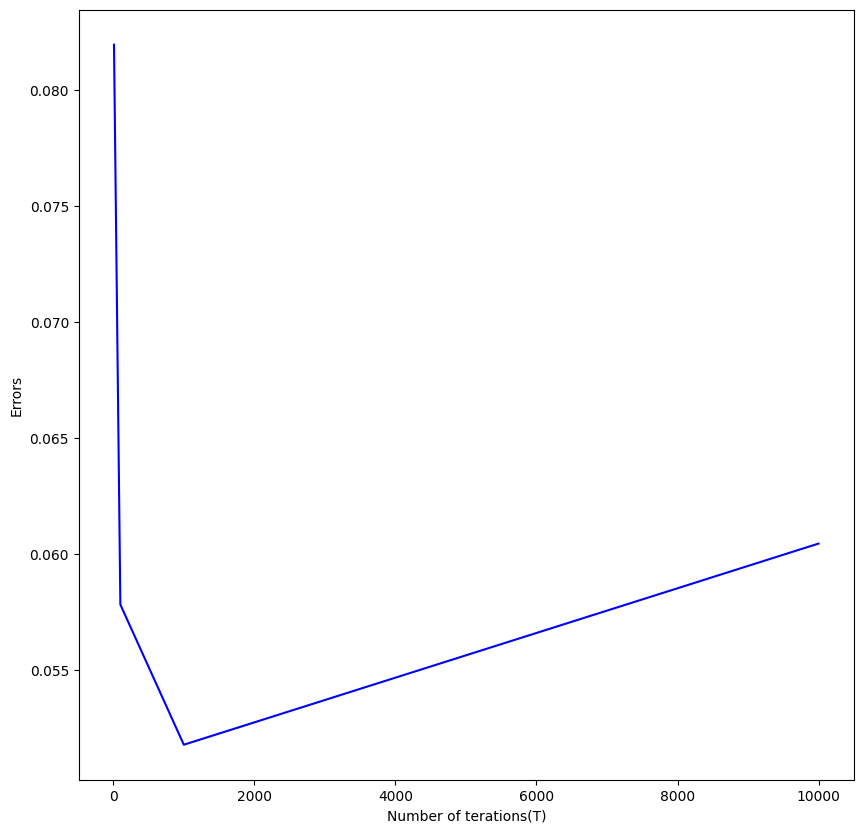

In [ ]:
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)

ax0.plot(iterations,errs,'-b')
ax0.set_xlabel('Number of terations(T)')
ax0.set_ylabel('Errors')

plt.show()

Using the graph we can choose k = 3; i.e. we choose T* = 1000

In [ ]:
itr = 1000

model = Boosting(1, itr, len(X_train_scaled))
model.fit(X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled)

train_err_t = model.train_err_t
test_err_t = model.test_err_t

Train FoldNumber 1: [Iterations 0/1000 (0%)]	Error: 0.216522
Train FoldNumber 1: [Iterations 100/1000 (10%)]	Error: 0.474063
Train FoldNumber 1: [Iterations 200/1000 (20%)]	Error: 0.482678
Train FoldNumber 1: [Iterations 300/1000 (30%)]	Error: 0.485971
Train FoldNumber 1: [Iterations 400/1000 (40%)]	Error: 0.487893
Train FoldNumber 1: [Iterations 500/1000 (50%)]	Error: 0.490031
Train FoldNumber 1: [Iterations 600/1000 (60%)]	Error: 0.490639
Train FoldNumber 1: [Iterations 700/1000 (70%)]	Error: 0.490766
Train FoldNumber 1: [Iterations 800/1000 (80%)]	Error: 0.490807
Train FoldNumber 1: [Iterations 900/1000 (90%)]	Error: 0.491951


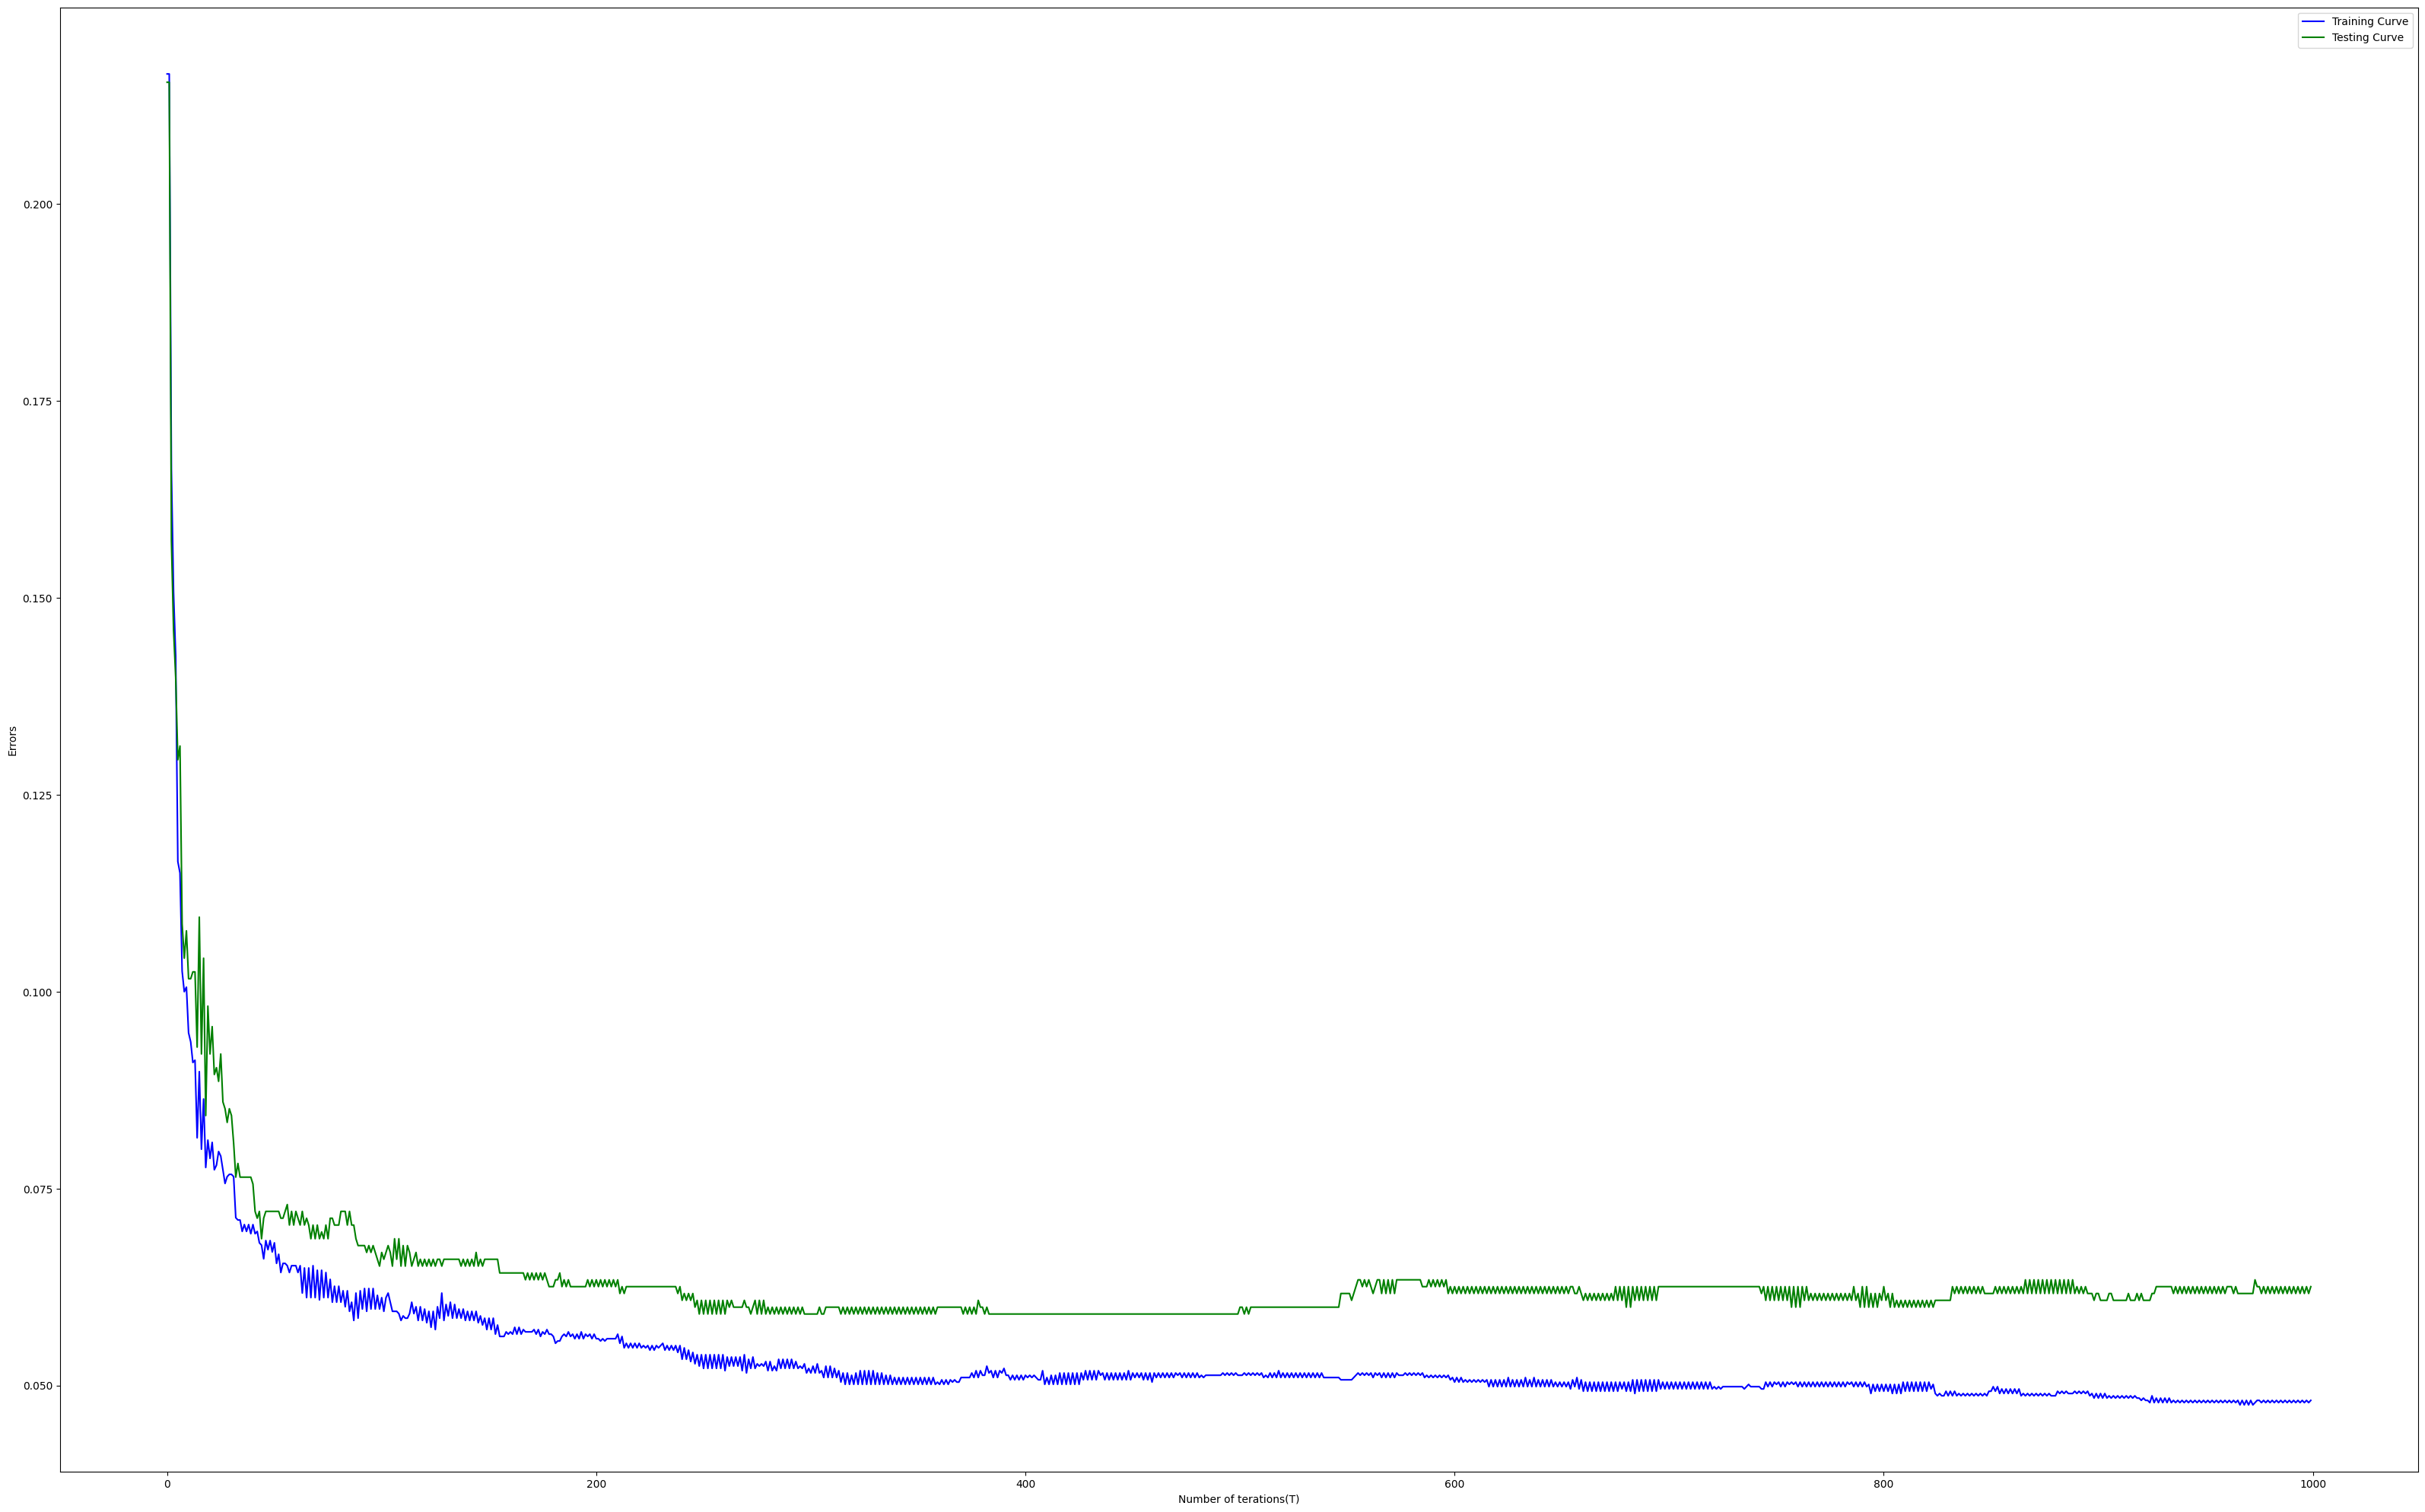

In [ ]:
fig = plt.figure(figsize=(40, 25))
ax0 = fig.add_subplot(111)

ax0.plot(range(itr), train_err_t, '-b', label= 'Training Curve')
ax0.plot(range(itr), test_err_t, '-g', label= 'Testing Curve')
ax0.set_xlabel('Number of terations(T)')
ax0.set_ylabel('Errors')

plt.legend()
plt.show()